In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

In [2]:
options_1 = pd.read_csv('New_option_prices_1.csv')
options_2 =pd.read_csv('New_option_prices_2.csv')
#For New_option_prices_1 the spot price is approximately 1593; for New_option_prices_2 the spot price is approximately 1624

### Newton-Raphson method

In [3]:
def newton_vol_call(S, K, T, C, r, sigma):
    
    #S: spot price, 1593 and 1624.
    #K: strike price
    #T: time to maturity
    #C: Call value
    #r: interest rate
    #sigma: volatility of underlying asset, guess! 0.2
    
    d1 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    fx = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) - C
    
    vega = (1 / np.sqrt(2 * np.pi)) * S * np.sqrt(T) * np.exp(-(si.norm.cdf(d1, 0.0, 1.0) ** 2) * 0.5)
    
    tolerance = 0.000001
    x0 = sigma
    xnew  = x0
    xold = x0 - 1
        
    while abs(xnew - xold) > tolerance:
    
        xold = xnew
        xnew = (xnew - fx - C) / vega
        
        return abs(xnew)

In [17]:
#newton_vol_call(1593,1550,0.024658,45.188,0,0.2)
options_1.columns

Index(['TimeToMaturity', 'StrikePrice', 'CallOptionPrice'], dtype='object')

In [29]:
options_1['ImpliedVolatility_0.2'] = options_1.groupby('StrikePrice').apply(lambda x: newton_vol_call(1593,x['StrikePrice'],x['TimeToMaturity'],x['CallOptionPrice'],0,0.2)).reset_index(level=0)[0]
options_1['ImpliedVolatility_0.3'] = options_1.groupby('StrikePrice').apply(lambda x: newton_vol_call(1593,x['StrikePrice'],x['TimeToMaturity'],x['CallOptionPrice'],0,0.3)).reset_index(level=0)[0]
options_1['ImpliedVolatility_0.4'] = options_1.groupby('StrikePrice').apply(lambda x: newton_vol_call(1593,x['StrikePrice'],x['TimeToMaturity'],x['CallOptionPrice'],0,0.4)).reset_index(level=0)[0]
#The implied volatility values are not stable at all!

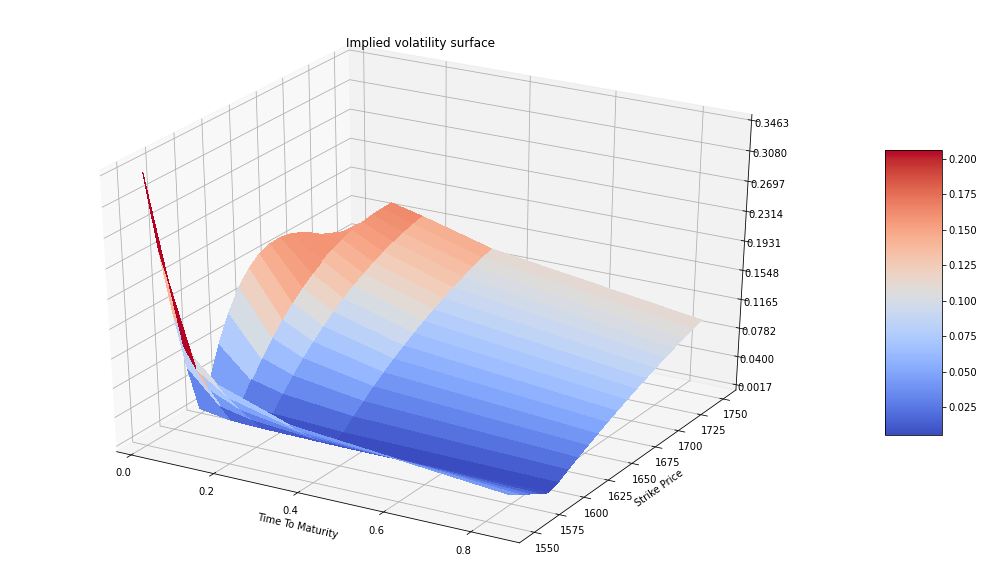

In [35]:
#%matplotlib widget
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = options_1['TimeToMaturity'].unique()
Y = options_1['StrikePrice'].unique()
X, Y = np.meshgrid(X, Y)
Z = []
for i in range(5):
    Z.append(options_1['ImpliedVolatility_0.4'].iloc[i*21:(i+1)*21].values)
Z = np.transpose(np.array(Z))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Implied volatility surface')
plt.ylabel('Strike Price')
plt.xlabel('Time To Maturity')
fig.set_size_inches(18.5, 10.5)
plt.show()

In [28]:
options_1.groupby('StrikePrice').get_group(1550)

,TimeToMaturity,StrikePrice,CallOptionPrice,ImpliedVolatility
0,0.024658,1550,45.188,0.475742
21,0.101370,1550,50.624,0.171143
42,0.178080,1550,56.226,0.117182
63,0.347950,1550,68.283,0.076048
84,0.849320,1550,95.112,0.043575
